In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["svg.fonttype"] = "none"

from src.coactivation.phase_shift_metrics_numpy import (
    phase_shift_metric_CrossCorr,
    phase_shift_metric_FFT,
    phase_shift_metric_Hilbert,
    phase_shift_metric_Hilbert_from_FFT,
)

Using diffeqsolve-based neural simulation (original)


In [3]:
def plot_signals(time, data1, data2):
    plt.figure(figsize=(8, 3))
    plt.plot(time, data1)
    plt.plot(time, data2)
    plt.show()


def phase_shift_signals(data, phase, period, dt):
    try:
        data_shifted = [np.roll(dat, -int(phas / (2 * np.pi) * period / dt)) for dat, phas in zip(data, phase)]
    except:
        data_shifted = np.roll(data, -int(phase / (2 * np.pi) * period / dt))
    return data_shifted

In [4]:
num_timesteps = 10000
dt = 1e-3
period = 2.0

# define time axis
time = np.arange(0, num_timesteps*dt, dt)
jtime = jnp.array(time)

# define data
data_gen_period = period/2
data1 = (data_gen_period/2)**2 - (time % data_gen_period - data_gen_period/2)**2
# data1 = np.cos(2 * np.pi * time / period)
data2 = np.sin(2 * np.pi * time / period)

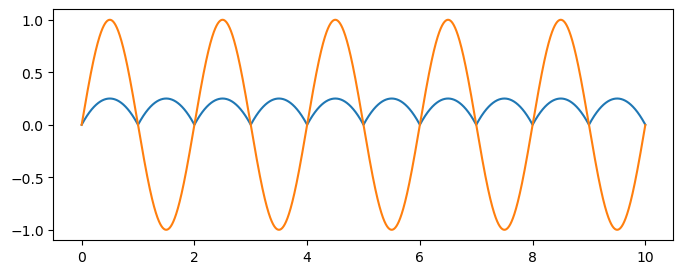

In [5]:
plot_signals(time, data1, data2)

In [6]:
# # phase shift data
# data1_shifted, data2_shifted = phase_shift_signals(data=[data1, data2], phase=[np.pi, np.pi/2], period=period, dt=dt)
# plot_signals(time, data1_shifted, data2_shifted)

In [7]:
print(phase_shift_metric_CrossCorr(data1, data2, dt))
print(phase_shift_metric_FFT(data1, data2, dt))
print(phase_shift_metric_Hilbert(data1, data2, dt))
print(phase_shift_metric_Hilbert_from_FFT(data1, data2, dt))

target_freq1: 1.0, target_freq2: 0.5, target_freq: 0.75
4.71238898038469
-1.2354930607644423
-0.0015707963267940102
-0.001570796326793979


In [8]:
analytic_signal1 = scipy.signal.hilbert(data1 - np.mean(data1))
analytic_signal2 = scipy.signal.hilbert(data2 - np.mean(data2))
phase1 = np.angle(analytic_signal1)
phase2 = np.angle(analytic_signal2)
phase_shift = np.angle(analytic_signal1 / analytic_signal2)
# phase_shift = np.mean(phase_shift)

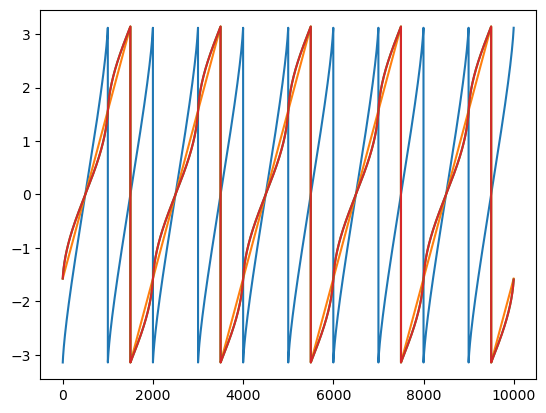

In [9]:
plt.plot(phase1)
plt.plot(phase2)
plt.plot((phase1 - phase2+np.pi)%(2*np.pi)-np.pi)
plt.plot(phase_shift)
plt.show()

In [10]:
np.abs(phase_shift - ((phase1 - phase2+np.pi)%(2*np.pi)-np.pi)).max()

np.float64(8.881784197001252e-16)